<a href="https://colab.research.google.com/github/SMenon-14/Zoo-App/blob/main/Zoo-App/model/Training_ZooApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0
!pip install tensorflow_hub

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [ ]:
print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.4.1
Hub version:  0.12.0
Eager mode:  True
GPU is NOT AVAILABLE


In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive',force_remount=True)
print ('hello')

Mounted at /content/gdrive
hello


In [ ]:
# Create data generator for training and validation

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = '/content/gdrive/My Drive/ZooApp/Images/Training'

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 817 images belonging to 68 classes.
Found 3268 images belonging to 68 classes.


In [ ]:
# Learn more about data batches

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 68)


In [ ]:
# Learn about dataset labels

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['African Bullfrog' 'African Crested Porcupine' 'African Lungfish'
 'African Painted Dog' 'African Red-Billed Hornbill' 'African Rock Python'
 'African Slender-Snouted Crocodile' 'African Spurred Tortoise'
 "Allen'S Swamp Monkey" 'American Beaver' 'American Black Bear'
 'Amur Tiger' 'Asian Elephant' 'Bald Eagle' 'Black Rhinoceros'
 'Black And White-Ruffed Lemur' 'Bontebok' 'Bufflehead' 'Bull Trout'
 'California Condor' 'Cattle Egret' 'Cheetah' 'Chimpanzee'
 'Chinook Salmon' 'Cinnamon Teal' 'Coho Salmon' 'Colobus Monkey' 'Cougar'
 "De Brazza'S Monkey" 'Dwarf Mongoose' 'Giraffe' 'Grey Gull' 'Hadada Ibis'
 'Harbor Seal' 'Hooded Merganser' 'Humboldt Penguin' 'Inca Tern'
 'Lesser Flamingo' 'Lion' 'Naked Mole Rat' 'Nankin Chicken'
 'Northern Pintail' 'Northern Shoveler' 'Orangutan' 'Pacific Lamprey'
 'Polar Bear' 'Pygmy Goat' 'Pygora Goat' 'Rainbow Trout' 'Red Panda'
 'Red-Crested Pochard' 'Redhead' 'Ring-Tailed Lemur' 'Ringtail'
 'River Otter' 'Rocky Mountain Goat' 'Rodrigues Flying Fox' 'S

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 68)                87108     
Total params: 2,345,092
Trainable params: 87,108
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
# Run model training

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Train for 103.0 steps, validate for 26.0 steps
Epoch 1/10
103/103 [==============================] - 364s 4s/step - loss: 3.6130 - acc: 0.2130 - val_loss: 1.1011 - val_acc: 0.8188
Epoch 2/10
103/103 [==============================] - 205s 2s/step - loss: 2.1318 - acc: 0.5052 - val_loss: 0.5535 - val_acc: 0.8911
Epoch 3/10
103/103 [==============================] - 210s 2s/step - loss: 1.7695 - acc: 0.5826 - val_loss: 0.3878 - val_acc: 0.9204
Epoch 4/10
103/103 [==============================] - 206s 2s/step - loss: 1.5639 - acc: 0.6200 - val_loss: 0.2955 - val_acc: 0.9449
Epoch 5/10
103/103 [==============================] - 208s 2s/step - loss: 1.4069 - acc: 0.6597 - val_loss: 0.2337 - val_acc: 0.9559
Epoch 6/10
103/103 [==============================] - 211s 2s/step - loss: 1.3280 - acc: 0.6735 - val_loss: 0.2026 - val_acc: 0.9645
Epoch 7/10
103/103 [==============================] - 206s 2s/step - loss: 1.2272 - acc: 0.6916 - val_loss: 0.1806 - val_acc: 0.9682
Epoch 8/10
103/103 [==

In [ ]:
# Measure accuracy and loss after training

final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

26/26 [==============================] - 45s 2s/step - loss: 0.1364 - acc: 0.9780


In [ ]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.14
Final accuracy: 97.80%


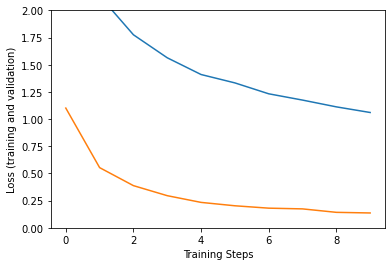

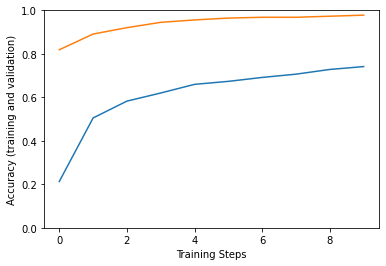

In [ ]:
# Visualize training process

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [ ]:
ZOO_ANIMALS_SAVED_MODEL = "/content/gdrive/My Drive/ZooApp"
tf.saved_model.save(model, ZOO_ANIMALS_SAVED_MODEL)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/ZooApp/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/ZooApp/assets


In [ ]:
# Load SavedModel

animals_model = hub.load(ZOO_ANIMALS_SAVED_MODEL)
print(animals_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7fc84633af50>


In [ ]:
# Get images and labels batch from validation dataset generator

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = animals_model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 68)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,African Bullfrog,African Crested Porcupine,African Lungfish,African Painted Dog,African Red-Billed Hornbill,African Rock Python,African Slender-Snouted Crocodile,African Spurred Tortoise,Allen'S Swamp Monkey,American Beaver,American Black Bear,Amur Tiger,Asian Elephant,Bald Eagle,Black Rhinoceros,Black And White-Ruffed Lemur,Bontebok,Bufflehead,Bull Trout,California Condor,Cattle Egret,Cheetah,Chimpanzee,Chinook Salmon,Cinnamon Teal,Coho Salmon,Colobus Monkey,Cougar,De Brazza'S Monkey,Dwarf Mongoose,Giraffe,Grey Gull,Hadada Ibis,Harbor Seal,Hooded Merganser,Humboldt Penguin,Inca Tern,Lesser Flamingo,Lion,Naked Mole Rat,Nankin Chicken,Northern Pintail,Northern Shoveler,Orangutan,Pacific Lamprey,Polar Bear,Pygmy Goat,Pygora Goat,Rainbow Trout,Red Panda,Red-Crested Pochard,Redhead,Ring-Tailed Lemur,Ringtail,River Otter,Rocky Mountain Goat,Rodrigues Flying Fox,Sacred Ibis,Southern Ground Hornbill,Southern Sea Otter,Speke'S Gazelle,Straw-Colored Fruit Bat,Veiled Chameleon,Western Painted Turtle,White Sturgeon,White-Cheeked Gibbon,White-Faced Whistling Duck,Wood Duck
0,0.00074303,1.22031830e-04,0.00028831,0.00015115,0.00000467,0.00016350,0.00027569,0.00008495,0.00002906,0.00005600,0.00010231,0.00002308,0.00237140,0.00000523,0.98170990,0.00003238,0.00440885,0.00000206,0.00047060,0.00004569,0.00006104,0.00002632,0.00045609,0.00009337,0.00002024,0.00187705,0.00001980,0.00003030,0.00001342,0.00000734,0.00030399,0.00021171,0.00014051,0.00014922,0.00006405,0.00023467,0.00002649,0.00010830,0.00153454,0.00070793,0.00010458,0.00007637,0.00044196,0.00003039,0.00003914,0.00008958,0.00021545,0.00032826,0.00009600,0.00001190,0.00002469,0.00013611,0.00000298,0.00000749,0.00011337,0.00010978,0.00011739,0.00003379,0.00024611,0.00008627,0.00003997,0.00020795,0.00002622,0.00014503,0.00001941,0.00002248,0.00004269,0.00000839
1,0.00000044,5.35210321e-09,0.00000133,0.00000945,0.00004660,0.00001168,0.00000215,0.00000597,0.00000059,0.00000008,0.00000069,0.00000047,0.00000998,0.00000170,0.00000441,0.00001334,0.00000679,0.00001345,0.00002224,0.00002792,0.00019139,0.00000045,0.00000042,0.00000231,0.00032560,0.00001112,0.00000193,0.00000799,0.00000280,0.00000044,0.00006159,0.00000402,0.00016207,0.00000024,0.00003135,0.00006960,0.00052401,0.99062961,0.00000183,0.00036691,0.00003769,0.00004840,0.00000529,0.00000137,0.00012368,0.00005593,0.00000061,0.00002583,0.00005110,0.00000152,0.00249712,0.00066964,0.00000770,0.00000112,0.00000200,0.00000537,0.00001357,0.00065920,0.00036218,0.00000053,0.00000645,0.00003791,0.00000721,0.00000034,0.00000931,0.00001412,0.00267988,0.00009984
2,0.00000525,2.78174156e-07,0.00011025,0.00009155,0.00000147,0.00001645,0.00000936,0.00000479,0.00018854,0.00001168,0.00003805,0.00019396,0.00015029,0.00001801,0.00020522,0.00000034,0.00000871,0.00000007,0.00001402,0.00000274,0.00001370,0.00282440,0.00001604,0.00001715,0.00000174,0.00001884,0.00000097,0.02703744,0.00000161,0.00002983,0.00140954,0.00000309,0.00000397,0.00002793,0.00000352,0.00001206,0.00001419,0.00001373,0.96688086,0.00013663,0.00003748,0.00006902,0.00000457,0.00002647,0.00001986,0.00005398,0.00000275,0.00000711,0.00000114,0.00001464,0.00002192,0.00002264,0.00000182,0.00000578,0.00003162,0.00000392,0.00000107,0.00000142,0.00001592,0.00000297,0.00001576,0.00006211,0.00000718,0.00000496,0.00000086,0.00000634,0.00000286,0.00001565
3,0.00000275,5.20440008e-05,0.00004720,0.00000729,0.00000027,0.00000177,0.00003824,0.00000651,0.00000517,0.00000797,0.99809104,0.00001229,0.00001784,0.00003210,0.00001285,0.00001571,0.00000048,0.00000160,0.00000898,0.00004805,0.00000244,0.00000365,0.00041228,0.00000464,0.00000125,0.00002843,0.00003983,0.00000772,0.00002189,0.00006794,0.00001412,0.00000293,0.00000105,0.00018560,0.00000827,0.00011955,0.00000668,0.00000067,0.00000210,0.00001539,0.00000635,0.00000024,0.00000747,0.00000659,0.00003758,0.00017297,0.00008814,0.00000068,0.00002839,0.00000883,0.00000573,0.00000251,0.00000453,0.00002426,0.00017043,0.00000367,0.00000362,0.00000006,0.00000232,0.00

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

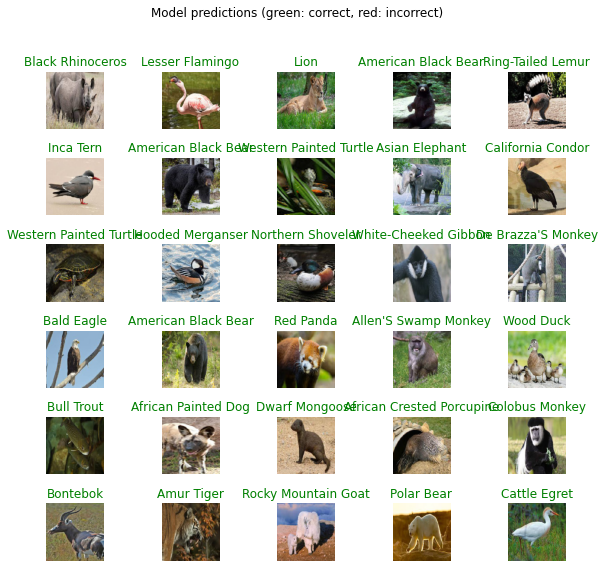

In [ ]:
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
TFLITE_MODEL = "/content/gdrive/My Drive/ZooApp/animals.tflite"
TFLITE_QUANT_MODEL = "/content/gdrive/My Drive/ZooApp/animals_quant.tflite"

In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : animals_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 12M
-rw-r--r-- 1 root root 2.7M Apr 25 15:40 animals_quant.tflite
-rw-r--r-- 1 root root 8.9M Apr 25 15:40 animals.tflite
